## The R code and explanations can be found here:

## https://theoreticalecology.wordpress.com/2010/09/17/metropolis-hastings-mcmc-in-r/

# Some small changes were made.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm.notebook import tqdm
from sklearn import linear_model
%matplotlib inline


[[5.10337478]] [3.03453314]


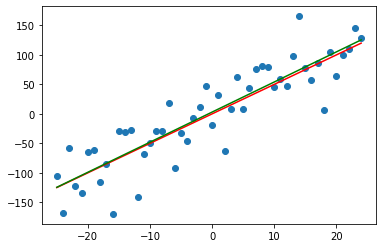

In [2]:
trueA = 5
trueB = 0
trueSd = 40
sampleSize = 51
np.random.seed(1234)
# create independent x-values 
x=np.arange(-(sampleSize-1)//2,(sampleSize-1)//2)
# create dependent values according to ax + b + N(0,sd)
y= trueA * x+trueB + np.random.normal(0,trueSd,sampleSize-1)

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y.reshape(-1,1))
pred=regr.predict(x.reshape(-1,1))
#plot(x,y, main="Test Data")
plt.scatter(x,y)
plt.plot(x,trueA * x+trueB,c='r')
plt.plot(x,pred,c='g')
print(regr.coef_,regr.intercept_)

In [3]:
def likelihood (a,b,sd):
    pred = a*x+b
    dist = stats.norm(pred, sd)
    singlelikelihoods = dist.pdf(y)
    return(singlelikelihoods.prod())
def loglikelihood (a,b,sd):
    pred = a*x+b
    dist = stats.norm(pred, sd)
    #singlelikelihoods = dist.pdf(y)
    singlelikelihoods = np.log(dist.cdf(y))
    return(singlelikelihoods.sum())

def loglikelihood_bk (a,b,sd):
    pred = a*x+b
    dist = stats.norm(pred, sd)
    singlelikelihoods = np.log(dist.pdf(y))
    return(singlelikelihoods.sum())

#print(trueA, trueB, trueSd,loglikelihood(trueA, trueB, trueSd))
#print(trueA, trueB, trueSd,loglikelihood(trueA, trueB, trueSd))

#print(trueA, trueB, trueSd,loglikelihood_bk(3, trueB, trueSd))
#print(trueA, trueB, trueSd,loglikelihood_bk(trueA, trueB, trueSd))

Text(0, 0.5, 'Log likelihood')

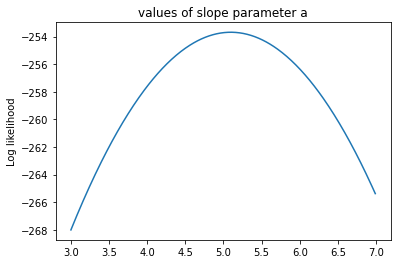

In [4]:
slopevalues = lambda x : (loglikelihood_bk(x, trueB, trueSd))
xx=np.arange(3,7,0.01)
slopelikelihoods=list(map(slopevalues,xx))#
slopelikelihoods
plt.plot(xx,slopelikelihoods)
plt.title('values of slope parameter a')
plt.ylabel('Log likelihood')

Text(0, 0.5, 'Log likelihood')

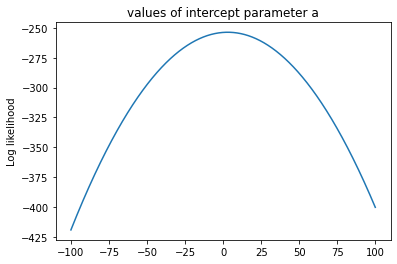

In [5]:
intervalues = lambda x : (loglikelihood_bk(trueA, x, trueSd))
xx=np.arange(-100,100,0.1)
interlikelihoods=list(map(intervalues,xx))#

plt.plot(xx,interlikelihoods)
plt.title('values of intercept parameter a')
plt.ylabel('Log likelihood')

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


Text(0, 0.5, 'Log likelihood')

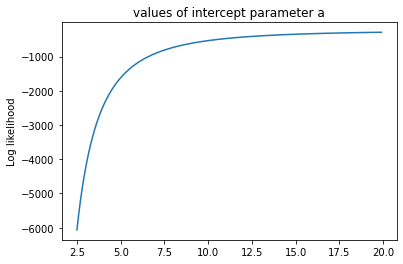

In [6]:
sdvalues = lambda x : (loglikelihood_bk(trueA, trueB, x))
xx=np.arange(2,20,0.1)
sdlikelihoods=list(map(sdvalues,xx))#

plt.plot(xx,sdlikelihoods)
plt.title('values of intercept parameter a')
plt.ylabel('Log likelihood')

In [7]:
def prior(a,b,sd) :
    adist  = stats.uniform(0,10)
    bdist  = stats.norm(0,5)
    sddist = stats.uniform(0,30)
    aprior = np.log(adist.cdf(a))#dunif(a, min=0, max=10, log = T)
    bprior = np.log(bdist.cdf(b))#dnorm(b, sd = 5, log = T)
    sdprior = np.log(sddist.cdf(sd))#dunif(sd, min=0, max=30, log = T)
    return(aprior+bprior+sdprior)

def posterior(param):
    a=param[0]
    b=param[1]
    sd=param[2]
    return (loglikelihood_bk(a,b,sd) + prior(a,b,sd))


def proposalfunction(param):
    
    t1=np.random.normal(param[0],0.1)
    t2=np.random.normal(param[1],0.5)
    t3=np.random.normal(param[2],0.3)
    return(t1,t2,t3)
    #return(rnorm(3,mean = param, sd= c(0.1,0.5,0.3)))


def run_metropolis_MCMC(startvalue,iterations):
    chain = np.zeros((iterations+1,3))
    chain[0,:] = startvalue
    for i in tqdm(range(iterations)):
        proposal  = proposalfunction(chain[i,:])
        probab = np.exp(posterior(proposal) - posterior(chain[i,:]))
        if (np.random.uniform(0,1)<probab):
            chain[i+1,:] = proposal
        else:
            chain[i+1,:] = chain[i,:]
    return(chain)


In [8]:
startvalue = [4,0,10]
nsim=10000
chain = run_metropolis_MCMC(startvalue, nsim)



#acceptance = 1-mean(duplicated(chain[-(1:burnIn),]))

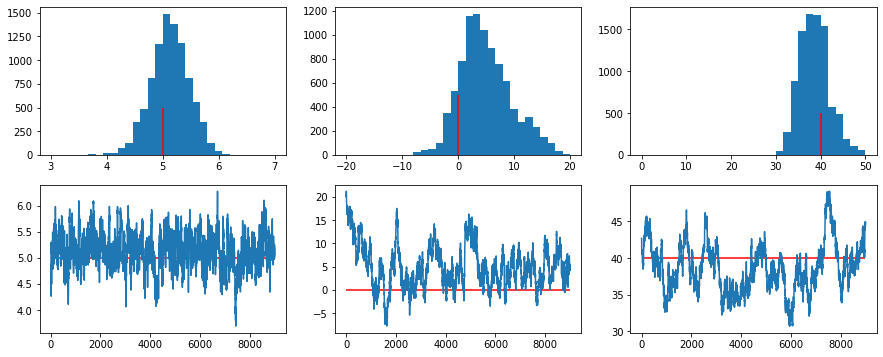

In [21]:
burnIn = 1000
#chain
#plt.plot(chain[burnIn:,1])
fig, ax = plt.subplots(2,3,figsize=(15,6))
ax[0,0].hist(chain[burnIn:,0],bins=30,range=(3,7))
ax[0,1].hist(chain[burnIn:,1],bins=30,range=(-20,20))
ax[0,2].hist(chain[burnIn:,2],bins=30,range=(0,50))
ax[1,0].plot(chain[burnIn:,0])
ax[1,1].plot(chain[burnIn:,1])
ax[1,2].plot(chain[burnIn:,2])

ax[0,0].vlines(trueA,ymin=0, ymax=500,colors ='r')
ax[0,1].vlines(trueB,ymin=0, ymax=500,colors ='r')
ax[0,2].vlines(trueSd,ymin=0,ymax=500,colors ='r')

ax[1,0].hlines(trueA,xmin=0, xmax=nsim-burnIn,colors ='r')
ax[1,1].hlines(trueB,xmin=0, xmax=nsim-burnIn,colors ='r')
ax[1,2].hlines(trueSd,xmin=0, xmax=nsim-burnIn,colors ='r')


5.126132706783509 4.969264294566998 38.65301812786272


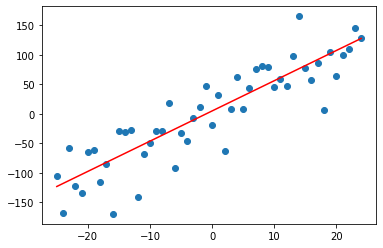

In [22]:
a_hat =np.mean(chain[burnIn:,0])
b_hat =np.mean(chain[burnIn:,1])
sd_hat=np.mean(chain[burnIn:,2])

print(a_hat,b_hat,sd_hat)
plt.scatter(x,y)
plt.plot(x,a_hat * x+b_hat,c='r')


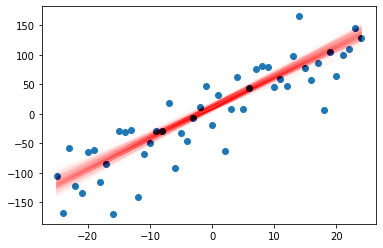

In [23]:
plt.scatter(x,y)
for i in range(1000):
    a_hat=chain[burnIn+i,0]
    b_hat=chain[burnIn+i,1]
    plt.plot(x,a_hat * x+b_hat,c='r',alpha=0.005)
    #print(a_hat,b_hat)

    
